# Logistic Regression

## 1. Perceptron trick

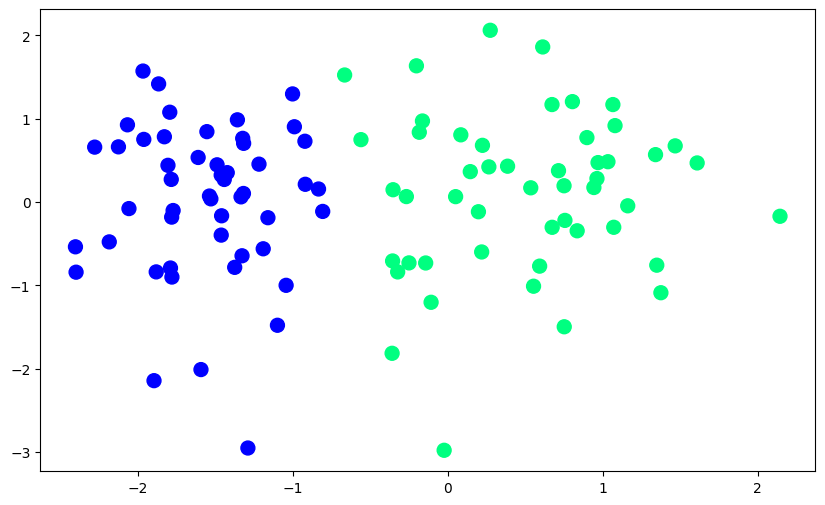

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [2]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        


In [3]:
def step(z):
    return 1 if z>0 else 0
intercept_,coef_ = perceptron(X,y)


In [4]:
print(coef_)
print(intercept_)

[1.37762959 0.11616081]
1.0


(-3.0, 2.0)

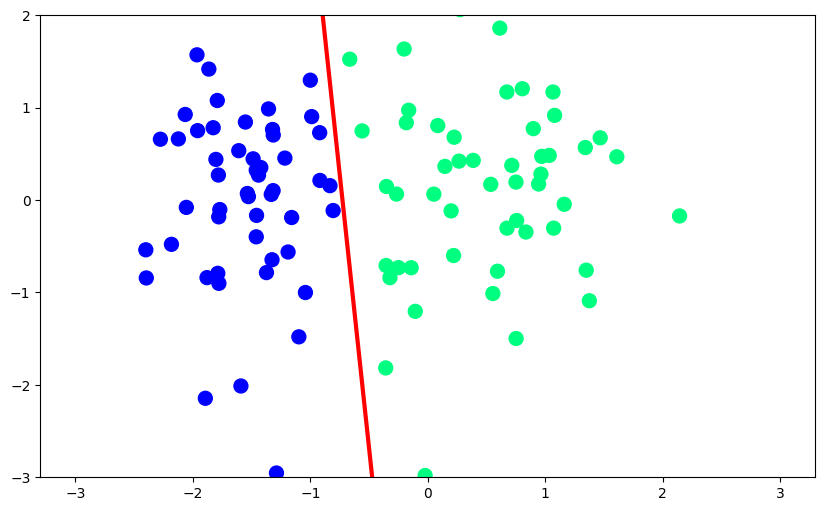

In [5]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [6]:
# animating
def perceptron(X,y):
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b
m,b = perceptron(X,y)

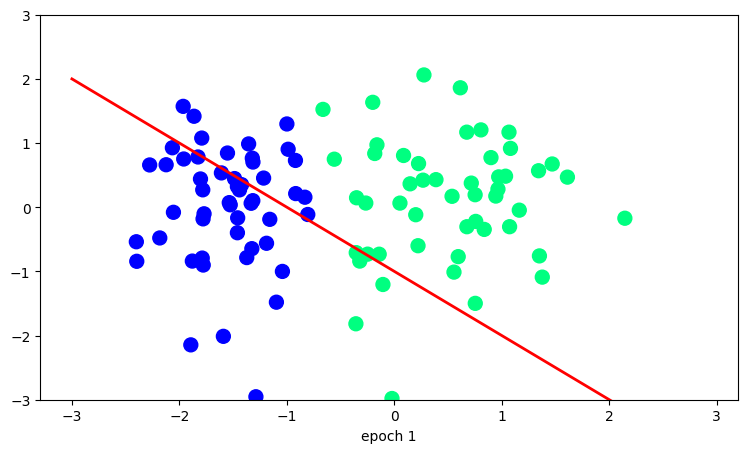

In [12]:

# %matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

_unable to animate due to PyQT5 error so there is the first frame_

## 2. The Sigmoid function

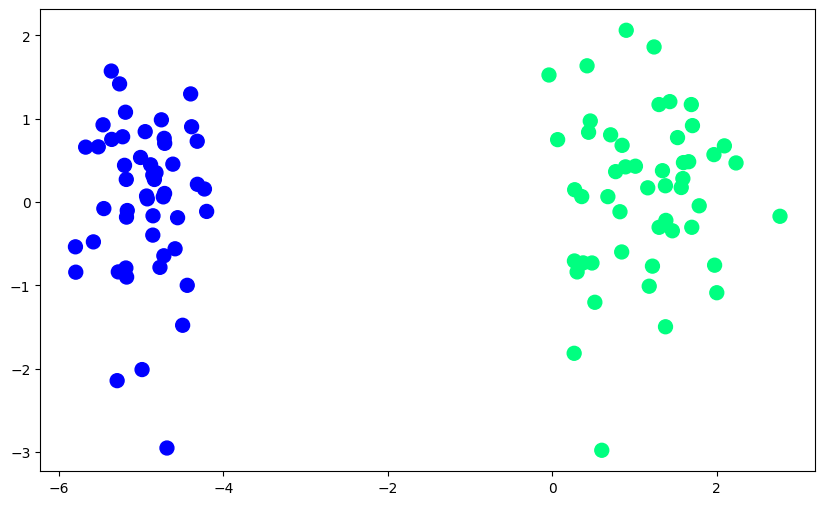

In [13]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [17]:
# nomral perceptron
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        


In [18]:
def step(z):
    return 1 if z>0 else 0
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[1.08682872 0.52024363]
1.2000000000000002


(-3.0, 2.0)

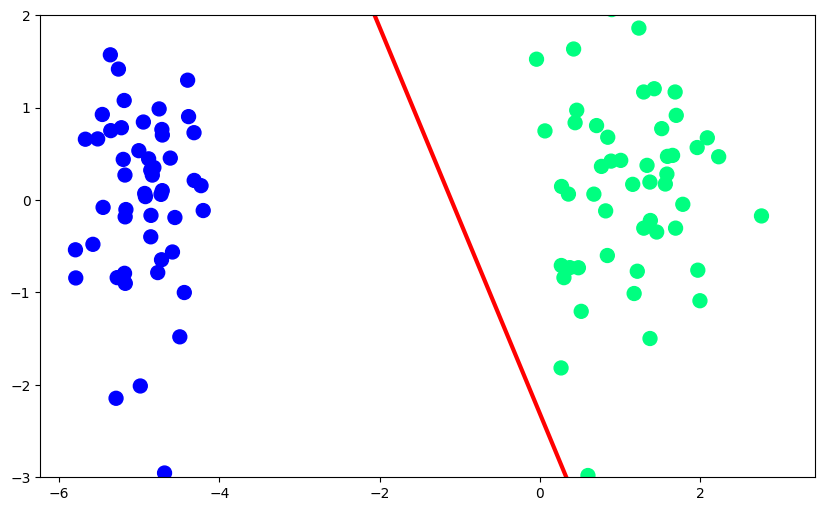

In [19]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [20]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

(-3.0, 2.0)

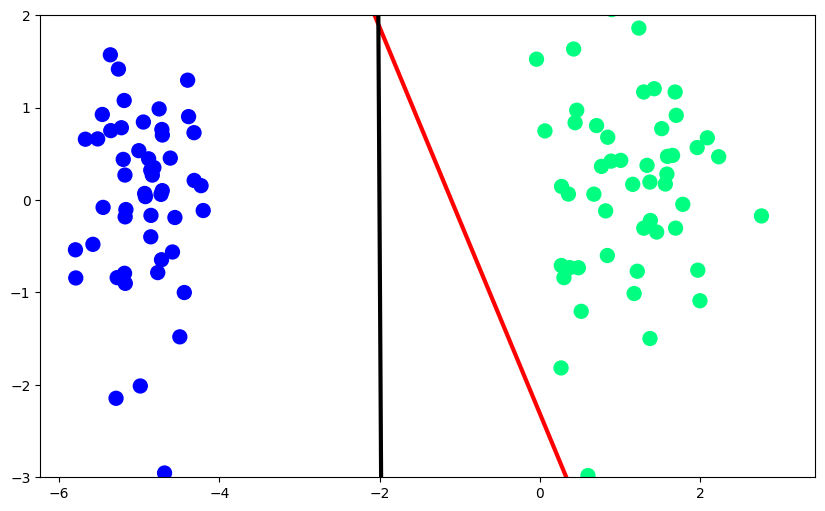

In [21]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [28]:
# sigmoid based perceptron
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]


In [29]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))


(-3.0, 2.0)

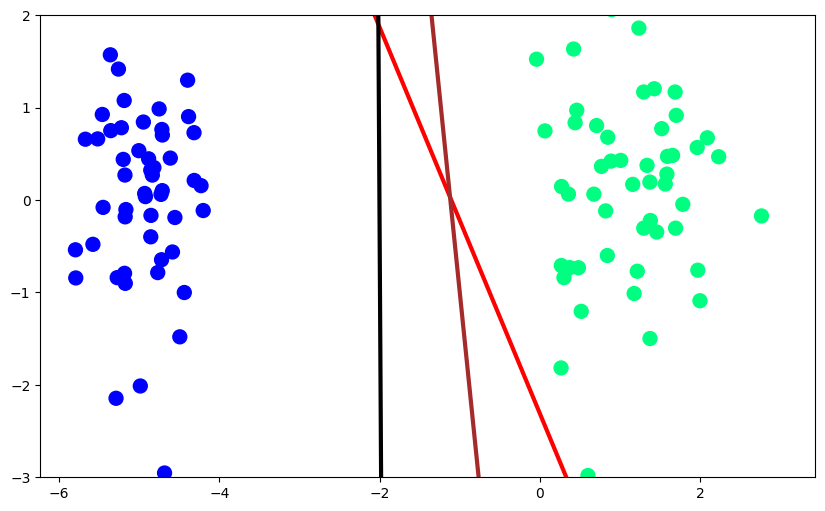

In [30]:
intercept_,coef_ = perceptron(X,y)
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## 3. Gradient descent

_for perfect LR: finding the laoss function and then minimizing it_

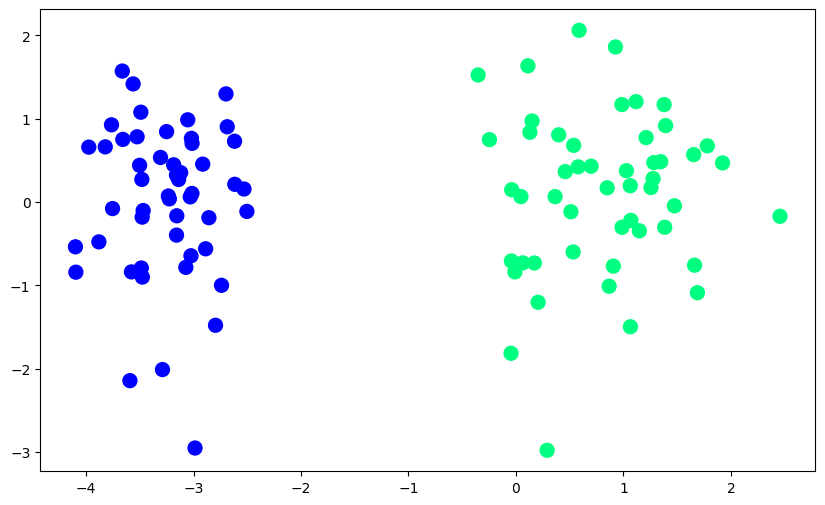

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [2]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(penalty='none', solver='sag')

In [3]:
print(lor.coef_)
print(lor.intercept_)

[[4.78381246 0.20648076]]
[5.7540789]


In [4]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [5]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]
        
def sigmoid(z):
    return 1/(1 + np.exp(-z))

(-3.0, 2.0)

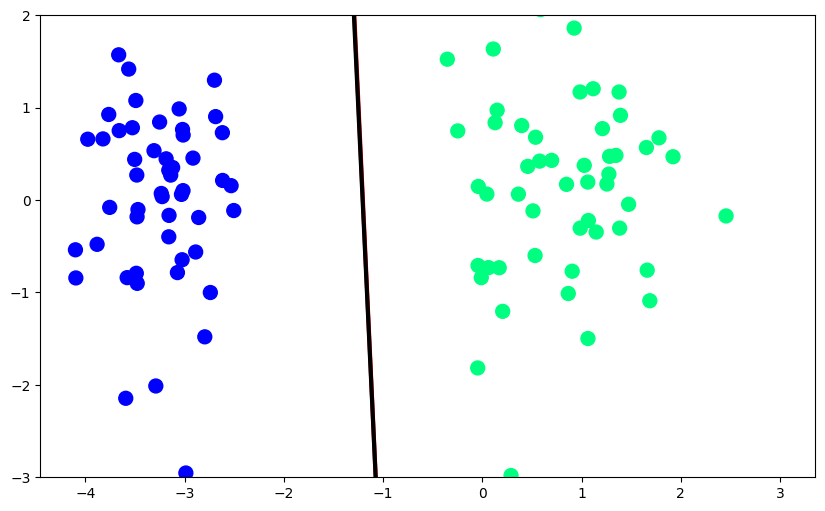

In [6]:
coef_,intercept_ = gd(X,y)
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)